In [2]:
import seaborn as sns, pandas as pd, numpy as np
from sklearn.svm import OneClassSVM
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import cross_val_score, cross_validate, ParameterGrid, GridSearchCV, LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score, accuracy_score, precision_recall_fscore_support, classification_report, roc_auc_score, precision_recall_curve, auc, make_scorer
import plotly.express as px
import shap
from sklearn.ensemble import IsolationForest
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt

data = pd.read_csv('./results/features_df.csv')
data

,Corpus,Type,Avg Word Length,Avg Sentence Length,TTR,MATTR,MTLD,Morpheme TTR,Avg Segs Per Word,Avg Forms Per Stem,Char Dist Entr,Word Dist Entr,Text Entr,Lex Entr,Rev Lex Entr
0,eo,con,5.175,18.909,10.708,0.692,67.482,7.535,1.859,3.506,4.164,10.923,4.435,6.303,7.016
1,nl,nat,5.419,18.194,8.559,0.694,74.165,12.467,1.809,3.044,4.117,10.593,4.389,6.407,6.746
2,is,nat,5.375,15.055,11.727,0.747,115.342,9.847,1.931,4.128,4.468,11.512,5.455,5.993,6.376
3,pl,nat,6.248,14.951,14.890,0.825,278.888,6.639,1.894,3.709,4.553,12.905,5.072,5.611,5.898
4,fr,nat,5.160,23.120,7.461,0.721,91.865,7.109,1.771,2.759,4.179,10.711,4.104,6.256,6.779
5,vo,con,5.072,11.266,2.455,0.622,39.447,15.287,1.567,1.938,4.256,7.666,1.281,8.702,9.037
6,af,nat,5.067,20.496,6.987,0.645,59.938,13.894,1.770,2.861,4.072,9.993,4.757,6.639,6.986
7,vi,nat,3.498,29.835,1.749,0.732,94.751,27.439,1.344,1.453,4.855,9.717,4.768,11.878,11.432
8,oc,nat,5.215,18.660,7.185,0.715,87.187,7.674,1.793,2.805,4.173,10.546,3.530,6.741,7.118
9,en,nat,5.087,21.301,6.079,0.697,77.659,10.049,1.661,2.360,4.167,10.673,4.771,7.106,7.601


### One Class SVM

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/site-packages/sklearn/metri

kernel           poly
degree              3
coef0             0.3
gamma          0.0001
nu                0.5
precision         1.0
recall       0.666667
f1                0.8
Name: 12179, dtype: object
ROC AUC: 0.8333333333333334


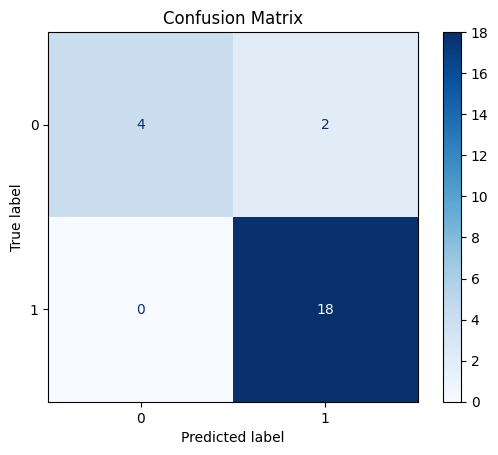

In [19]:
# OCSVM Finetuning
# Brute force approach (ParameterGrid)
# gamma defines how much influence a single training sample has. Smaller value means a larger radius of influence for each sample, and vice versa
# usually between γ∈[10^−6,10^0] used for the RBF kernel; common initial guesses around γ∈[0.001,1]
# nu is the upper bound on the fraction of training errors and a lower bound of support vectors. Controls proportion of outliers allowed
# usually between 0 and 1; common initial ranges around ν∈[0.01,0.5]

X, y = data.iloc[:,2:].values.round(decimals=3), data.iloc[:,1].map({'con':-1, 'nat':1}).values
scaler = StandardScaler()
# Train on target == 'nat' (natural languages)
X_train = scaler.fit_transform(X)

param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [0, 1, 2, 3, 5, 10],
    'coef0': [0.0, 0.001, 0.002, 0.005, 0.007, 0.01, 0.03, 0.05, 0.07, 0.1, 0.3, 0.5, 1.0],
    'gamma': ['scale', 'auto', 0.000001, 0.0001, 0.001, 0.01, 0.1, 1],
    'nu': [0.01, 0.05, 0.1, 0.2, 0.25, 0.5]
}

grid = ParameterGrid(param_grid)
results = []
for params in grid:
    ocsvm = OneClassSVM(
        kernel=params['kernel'], 
        degree=params['degree'], 
        coef0=params['coef0'], 
        gamma=params['gamma'], 
        nu=params['nu'],
        )
    y_pred = ocsvm.fit_predict(X_train)
    precision = precision_score(y, y_pred, pos_label=-1)
    recall = recall_score(y, y_pred, pos_label=-1)
    f1 = f1_score(y, y_pred, pos_label=-1)
    # ap = average_precision_score(y, y_pred, pos_label=-1)
    # roc_auc = roc_auc_score(y, ocsvm.decision_function(X_train))
    
    results.append({
        'kernel': params['kernel'],
        'degree': params['degree'],
        'coef0': params['coef0'],
        'gamma': params['gamma'],
        'nu': params['nu'],
        'precision': precision,
        'recall': recall,
        'f1': f1,
        # 'average_precision': ap,
        # 'roc_auc': roc_auc,
    })
    
ocsvm_finetuning_df = pd.DataFrame(results)
ocsvm_finetuning_df.to_csv('./results/ocsvm_finetuning_df.csv')
# Best parameters based on roc-auc score
# best_params_roc = ocsvm_finetuning_df.sort_values(by='roc_auc', ascending=False).iloc[0]
# print(best_params_roc)
# Best parameters based on average precision score
best_params = ocsvm_finetuning_df.sort_values(by='f1', ascending=False).iloc[0]
print(best_params)

# Evaluating fine-tuned model
ocsvm = OneClassSVM(
    kernel=best_params['kernel'],
    degree=best_params['degree'],
    coef0=best_params['coef0'],
    gamma=best_params['gamma'],
    nu=best_params['nu'],
)

y_pred = ocsvm.fit_predict(X_train)
decision_scores = ocsvm.decision_function(X_train)
roc_auc = roc_auc_score(y, decision_scores)
print(f"ROC AUC: {roc_auc}")

cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.savefig('./results/CM_ocsvm.png')
plt.show()

#### Fine-tuned OCSVM with Decision Boundary and dimension reductionality applied

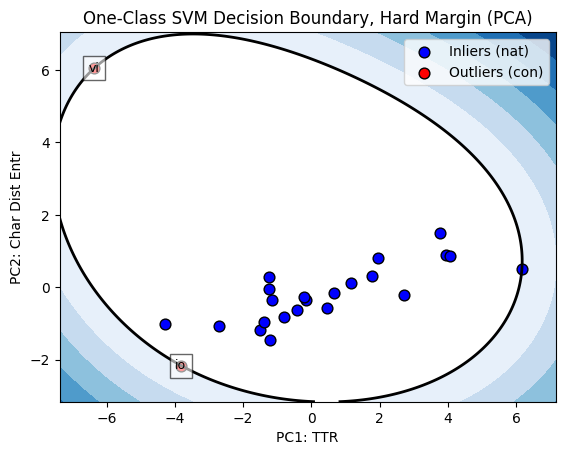

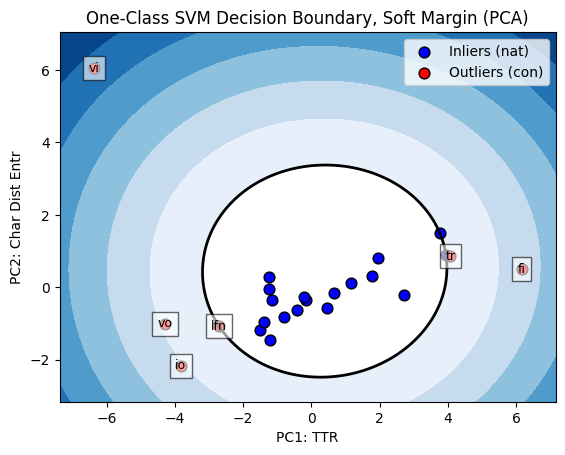

In [45]:
# Plot decision function of finetuned One-Class SVM (visualization in 2D space)
# How can I interpret the decision function? Should I visualize the decision boundary differently?

X, y = data.iloc[:,2:].values.round(decimals=3), data.iloc[:,1].map({'con':-1, 'nat':1}).values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Find PC1 and PC2
components_df = pd.DataFrame(pca.components_, columns=data.select_dtypes(include='number').columns, index=['PC1', 'PC2'])
def get_top_features(components_df, pc_name, top_n=1):
    pc_loadings = components_df.loc[pc_name]
    top_features = pc_loadings.abs().nlargest(top_n).index
    return top_features.tolist()

# Hard Margin OCSVM
# Has 2 outliers at n=0.05
hard_ocsvm = OneClassSVM(kernel='rbf', gamma=0.01, nu=0.05)
hard_ocsvm.fit(X_pca)

# Predict the decision function (distance to the decision boundary)
hard_decision_function = hard_ocsvm.decision_function(X_pca)
hard_pred = hard_ocsvm.predict(X_pca)

# Plot decision boundary and margins
xx, yy = np.meshgrid(np.linspace(X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1, 500),
                     np.linspace(X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1, 500))

Z = hard_ocsvm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision function as a contour plot
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='white')

plt.scatter(X_pca[hard_pred == 1][:, 0], X_pca[hard_pred == 1][:, 1], 
            c='blue', label='Inliers (nat)', edgecolors='k', s=60)
plt.scatter(X_pca[hard_pred == -1][:, 0], X_pca[hard_pred == -1][:, 1], 
            c='red', label='Outliers (con)', edgecolors='k', s=60)

for i, corpus_value in enumerate(data['Corpus'].values):
    if hard_pred[i] == -1: 
        plt.annotate(
            corpus_value, 
            (X_pca[i, 0], X_pca[i, 1]), 
            textcoords="offset points", xytext=(0, 0), 
            ha='center', va='center',  
            fontsize=9, color='black',
            bbox=dict(facecolor='white', alpha=0.6)  
        )

plt.title('One-Class SVM Decision Boundary, Hard Margin (PCA)')
plt.xlabel(f"PC1: {get_top_features(components_df, 'PC1')[0]}")
plt.ylabel(f"PC2: {get_top_features(components_df, 'PC2')[0]}")
plt.legend()
plt.savefig('./results/OCSVM_PCA_hard.png')
plt.show()

# Soft Margin OCSVM
# Has 8 outliers at n=0.3
soft_ocsvm = OneClassSVM(kernel='rbf', gamma=0.01, nu=0.3)
soft_ocsvm.fit(X_pca)

# Predict the decision function (distance to the decision boundary)
soft_decision_function = soft_ocsvm.decision_function(X_pca)
soft_pred = soft_ocsvm.predict(X_pca)

# Plot decision boundary and margins
xx, yy = np.meshgrid(np.linspace(X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1, 500),
                     np.linspace(X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1, 500))

Z = soft_ocsvm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision function as a contour plot
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='white')

plt.scatter(X_pca[soft_pred == 1][:, 0], X_pca[soft_pred == 1][:, 1], 
            c='blue', label='Inliers (nat)', edgecolors='k', s=60)
plt.scatter(X_pca[soft_pred == -1][:, 0], X_pca[soft_pred == -1][:, 1], 
            c='red', label='Outliers (con)', edgecolors='k', s=60)

for i, corpus_value in enumerate(data['Corpus'].values):
    if soft_pred[i] == -1: 
        plt.annotate(
            corpus_value, 
            (X_pca[i, 0], X_pca[i, 1]), 
            textcoords="offset points", xytext=(0, 0), 
            ha='center', va='center',  
            fontsize=9, color='black',
            bbox=dict(facecolor='white', alpha=0.6)  
        )

plt.title('One-Class SVM Decision Boundary, Soft Margin (PCA)')
plt.xlabel(f"PC1: {get_top_features(components_df, 'PC1')[0]}")
plt.ylabel(f"PC2: {get_top_features(components_df, 'PC2')[0]}")
plt.legend()
plt.savefig('./results/OCSVM_PCA_soft.png')
plt.show()

### Isolation Forest

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:15

max_samples           0.5
contamination        0.25
n_estimators            5
max_features          1.0
bootstrap           False
precision        0.666667
recall           0.666667
f1               0.666667
Name: 4168, dtype: object
ROC AUC: 0.6851851851851851
Number of outliers detected: -6
Number of inliers detected: 18


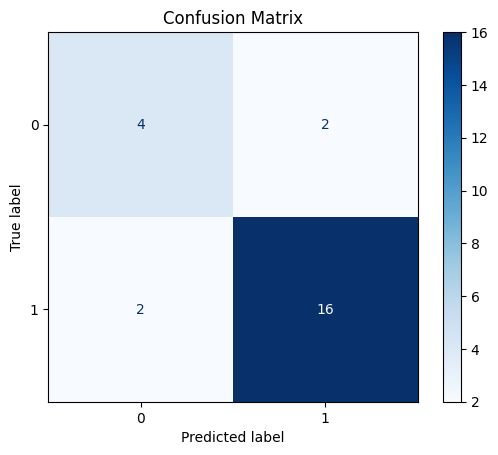

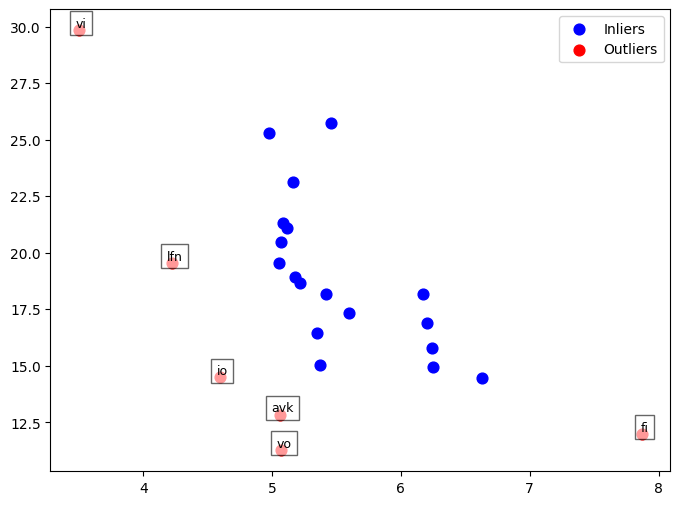

In [4]:
# Finetuning IF
X_train, y = data.iloc[:,2:].values.round(decimals=3), data.iloc[:,1].map({'con':-1, 'nat':1}).values

param_grid = {
    'max_samples': ['auto', 0.1, 0.3, 0.5, 0.7, 0.9, len(X_train)],
    'contamination': ['auto', 0.01, 0.03, 0.05, 0.1, 0.2, 0.25, 0.5],
    'n_estimators': [5, 10, 15, 20, 50, 100, 200, 300],
    'max_features': [0.1, 0.3, 0.5, 0.7, 1.0],
    'bootstrap': [True, False],
}

grid = ParameterGrid(param_grid)
results = []
for params in grid:
    ifo = IsolationForest(
        max_samples=params['max_samples'], 
        contamination=params['contamination'], 
        n_estimators=params['n_estimators'], 
        max_features=params['max_features'], 
        bootstrap=params['bootstrap'],
        random_state=42, 
        n_jobs=-1
        )
    y_pred = ifo.fit_predict(X_train)
    precision = precision_score(y, y_pred, pos_label=-1)
    recall = recall_score(y, y_pred, pos_label=-1)
    f1 = f1_score(y, y_pred, pos_label=-1)
    # ap = average_precision_score(y, y_pred, pos_label=-1)
    
    results.append({
        'max_samples': params['max_samples'],
        'contamination': params['contamination'],
        'n_estimators': params['n_estimators'],
        'max_features': params['max_features'],
        'bootstrap': params['bootstrap'],
        'precision': precision,
        'recall': recall,
        'f1': f1,
        # 'average_precision': ap,
    })
    
if_finetuning_df = pd.DataFrame(results)
if_finetuning_df.to_csv('./results/if_finetuning_df.csv')
# Best parameters based on average precision score
best_params = if_finetuning_df.sort_values(by='f1', ascending=False).iloc[0]
print(best_params)

# Evaluating fine-tuned model
ifo = IsolationForest(
    max_samples=best_params['max_samples'],
    contamination=best_params['contamination'],
    n_estimators=best_params['n_estimators'],
    max_features=best_params['max_features'],
    bootstrap=params['bootstrap'],
    random_state=42,
    n_jobs=-1,
)

y_pred = ifo.fit_predict(X_train)
decision_scores = ifo.decision_function(X_train)
roc_auc = roc_auc_score(y, decision_scores)
print(f"ROC AUC: {roc_auc}")
print('Number of outliers detected: {}'.format(y_pred[y_pred == -1].sum()))
print('Number of inliers detected: {}'.format(y_pred[y_pred == 1].sum()))

cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.savefig('./results/CM_if.png')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_pred == 1][:, 0], X_train[y_pred == 1][:, 1], label="Inliers", c='blue', s=60)
plt.scatter(X_train[y_pred == -1][:, 0], X_train[y_pred == -1][:, 1], label="Outliers", c='red', s=60)
for i, txt in enumerate(data['Corpus']):
    if y_pred[i] == -1: 
        plt.text(X_train[i, 0] + 0.02, X_train[i, 1] + 0.02, txt, fontsize=9, color='black',
                 ha='center', va='bottom', bbox=dict(facecolor='white', alpha=0.6))
# plt.title("Isolation Forest Outliers")
plt.legend()
plt.savefig('./results/IF_outliers.png')
plt.show()

# disp = DecisionBoundaryDisplay.from_estimator(
#     ifo,
#     X_train,
#     response_method="predict",
#     alpha=0.5,
# )
# disp.ax_.scatter(X_train[:,0], X_train[:,1], c=y, s=20, edgecolor="k")
# disp.ax_.set_title("Binary Decision Boundary \nof Isolation Forest")
# plt.axis("square")
# plt.legend()
# plt.show()

#### Fine-tuned IF's feature importances with SHAP

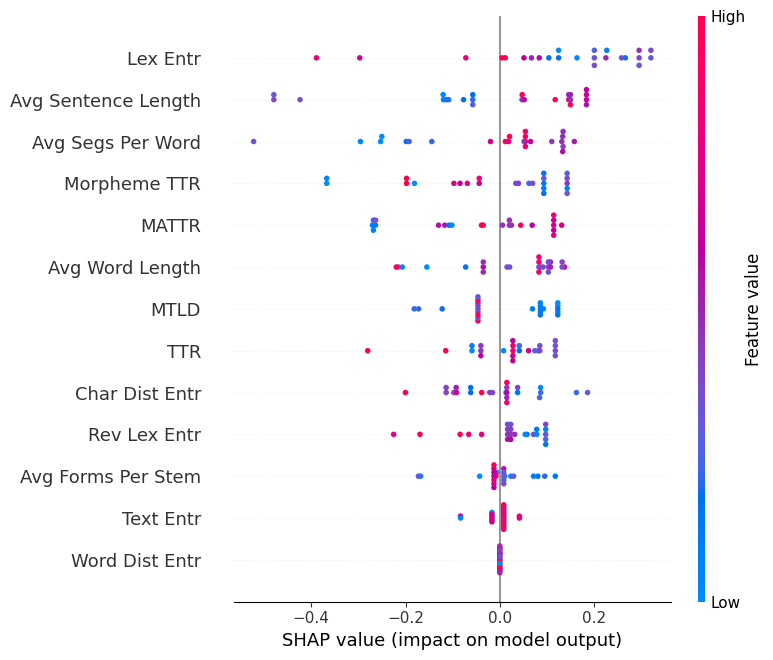

In [14]:
shap_values = shap.TreeExplainer(ifo).shap_values(X_train)
shap.summary_plot(shap_values, X_train, show=False, feature_names=data.iloc[:,2:].columns.values)
plt.savefig("./results/IF_SHAP_values.png")
plt.show()

# explainer = shap.Explainer(ifc)
# shap_values = explainer(X_train)
# shap.plots.waterfall(shap_values[0])

# def global_shap_importance(model, X):
#     """ Return a dataframe containing the features sorted by Shap importance
#     Parameters
#     ----------
#     model : The tree-based model 
#     X : pd.Dataframe
#          training set/test set/the whole dataset ... (without the label)
#     Returns
#     -------
#     pd.Dataframe
#         A dataframe containing the features sorted by Shap importance
#     """
#     explainer = shap.Explainer(model)
#     shap_values = explainer(X)
#     cohorts = {"": shap_values}
#     cohort_labels = list(cohorts.keys())
#     cohort_exps = list(cohorts.values())
#     for i in range(len(cohort_exps)):
#         if len(cohort_exps[i].shape) == 2:
#             cohort_exps[i] = cohort_exps[i].abs.mean(0)
#     features = cohort_exps[0].data
#     feature_names = cohort_exps[0].feature_names
#     values = np.array([cohort_exps[i].values for i in range(len(cohort_exps))])
#     feature_importance = pd.DataFrame(
#         list(zip(feature_names, sum(values))), columns=['features', 'importance'])
#     feature_importance.sort_values(
#         by=['importance'], ascending=False, inplace=True)
#     return feature_importance

#### IF with PCA

In [15]:
n_components = 3
pca = PCA(n_components=n_components)
components = pca.fit_transform(data.iloc[:,2:].values.round(decimals=3))

total_var = pca.explained_variance_ratio_.sum() * 100

labels = {str(i): f"PC {i+1}" for i in range(n_components)}
labels['color'] = 'Type'

fig = px.scatter_matrix(
    components,
    color=data['Type'],
    dimensions=range(n_components),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [16]:
score = ifo.decision_function(X_train)
score_df = pd.DataFrame(score, columns=['Decision Function Scores'])
data_scores = pd.concat([data['Corpus'], score_df], axis=1)
display(data_scores)

,Corpus,Decision Function Scores
0,eo,0.079197
1,nl,0.097234
2,is,0.063693
3,pl,0.004515
4,fr,0.066952
5,vo,-0.051547
6,af,0.082348
7,vi,-0.071528
8,oc,0.066952
9,en,0.080533


In [17]:
data['predictions'] = ifo.predict(X)
data['predictions'] = np.where(data['predictions']==-1,1,0)

n_components = 3
pca = PCA(n_components=n_components)
components = pca.fit_transform(data.iloc[:,2:].values.round(decimals=3))

total_var = pca.explained_variance_ratio_.sum() * 100

labels = {str(i): f"PC {i+1}" for i in range(n_components)}
labels['color'] = 'Type'

fig = px.scatter_matrix(
    components,
    color=data['predictions'],
    dimensions=range(n_components),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
)
fig.update_traces(diagonal_visible=False)
fig.show()

### Local Outlier Factor

Best parameters: n_neighbors             5
algorithm            auto
leaf_size              30
contamination        0.25
precision        0.888889
recall           0.888889
f1               0.888889
Name: 359, dtype: object


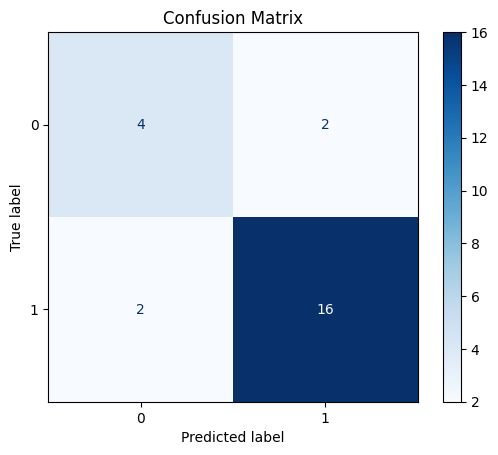

In [18]:
X, y = data.iloc[:,2:].values.round(decimals=3), data.iloc[:,1].map({'con':-1, 'nat':1}).values
scaler = StandardScaler()
X_train = scaler.fit_transform(X)

param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 12, 18],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [5, 10, 15, 30, 50, 100, 200, 300],
    'contamination': ['auto', 0.01, 0.03, 0.05, 0.1, 0.2, 0.25, 0.5],
}

grid = ParameterGrid(param_grid)
results = []
for params in grid:
    lof = LocalOutlierFactor(
        n_neighbors=params['n_neighbors'], 
        algorithm=params['algorithm'], 
        leaf_size=params['leaf_size'], 
        contamination=params['contamination'], 
        )
    y_pred = lof.fit_predict(X_train)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    # ap = average_precision_score(y, y_pred)
    
    results.append({
        'n_neighbors': params['n_neighbors'],
        'algorithm': params['algorithm'],
        'leaf_size': params['leaf_size'],
        'contamination': params['contamination'],
        'precision': precision,
        'recall': recall,
        'f1': f1,
        # 'average_precision': ap,
    })
    
lof_finetuning_df = pd.DataFrame(results)
lof_finetuning_df.to_csv('./results/lof_finetuning_df.csv')
# Best parameters based on f1 score
best_params = lof_finetuning_df.sort_values(by='f1', ascending=False).iloc[0]
print(f'Best parameters: {best_params}')

# Evaluating fine-tuned model
lof = LocalOutlierFactor(
    n_neighbors=best_params['n_neighbors'],
    algorithm=best_params['algorithm'],
    leaf_size=best_params['leaf_size'],
    contamination=best_params['contamination'],
)

y_pred = lof.fit_predict(X_train)
# decision_scores = lof.decision_function(X_train)
# roc_auc = roc_auc_score(y, decision_scores)
# print(f"ROC AUC: {roc_auc}")

cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.savefig('./results/CM_lof.png')
plt.show()